In [1]:
import os
import pandas as pd
from importlib import reload
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np
import seaborn as sns
from scipy import stats
from pingouin import welch_anova

In [2]:
os.chdir("..")

In [3]:
from my_modules.feature_extraction import one_hot
from my_modules import evaluate_performance
from my_modules.evaluate_performance import mcnemar_test

In [4]:
os.chdir("general_identification")

In [5]:
# for comparison of MFCC vs spec
chis = []
ps = []

# Dummy

In [6]:
# load vars
with open("results_mfccs/dummy/vars.p", "rb") as fb:
    dummy_vm = pickle.load(fb)
with open("results_specs/dummy/vars.p", "rb") as fb:
    dummy_vs = pickle.load(fb)
dummy_vm.keys()

dict_keys(['times', 'pred', 'probs', 'ytrues', 'individuals_test'])

In [7]:
%%capture
# load results

try:
    with open("results_mfccs/dummy/metrics.p", "rb") as fb:
        dummy_m = pickle.load(fb)
except EOFError:
    # reconstruct the metrics using the vars
    auc, _ = evaluate_performance.roc_auc(
        y=dummy_vm["ytrues"], y_true=one_hot(dummy_vm["ytrues"]),
        y_score=dummy_vm["probs"], 
        n_classes=len(np.unique(dummy_vm["individuals_test"]))
    )
    metr, acc, f1 = evaluate_performance.metrics(
        y=dummy_vm["ytrues"], yp=dummy_vm["pred"],
        y_true=one_hot(dummy_vm["ytrues"]),
        y_pred=one_hot(
            dummy_vm["pred"], 
            num_classes=len(np.unique(dummy_vm["individuals_test"]))
            ),
        labels=dummy_vm["individuals_test"]
    )
    d = {
        "mcc": evaluate_performance.matthews(
            y=dummy_vm["ytrues"], yp=dummy_vm["pred"]
            ),
        "auc": auc,
        "acc": acc,
        "f1": f1,
        "table": metr
    }
    # save the metrics
    with open("results_mfccs/dummy/metrics.p", "wb") as fb:
        pickle.dump(d, fb, protocol=pickle.HIGHEST_PROTOCOL)

    with open("results_mfccs/dummy/metrics.p", "rb") as fb:
        dummy_m = pickle.load(fb)

In [8]:
# relad the metrics for specs
with open("results_specs/dummy/metrics.p", "rb") as fb:
    dummy_ms = pickle.load(fb)

# K-means

In [9]:
# import results
with open("results_mfccs/kmeans/metrics.p", "rb") as fb:
    kmeans_mm = pickle.load(fb)
with open("results_specs/kmeans/metrics.p", "rb") as fb:
    kmeans_ms = pickle.load(fb)
with open("results_mfccs/kmeans/vars.p", "rb") as fb:
    kmeans_vm = pickle.load(fb)
with open("results_specs/kmeans/vars.p", "rb") as fb:
    kmeans_vs = pickle.load(fb)

In [10]:
print(f"Metrics: {kmeans_mm.keys()}")
print(f"Variables: {kmeans_vs.keys()}")

Metrics: dict_keys(['acc', 'auc', 'f1', 'mcc', 'kappa', 'table', 'mcnemar'])
Variables: dict_keys(['times', 'pred', 'probs', 'ytrues', 'individuals_test'])


In [11]:
# proof true targets are exactly the same
np.all(kmeans_vm["ytrues"] == kmeans_vs["ytrues"])

True

In [12]:
# McNemar's Test mfcc vs specs
chi, p, _ = mcnemar_test(
    y_true=kmeans_vm["ytrues"],
    clf1_pred=kmeans_vm["pred"],
    clf2_pred=kmeans_vs["pred"],
    print_contingency=True
    )
print(f"statistic: {chi}; p-valus: {p}")
chis.append(chi)
ps.append(p)

Contingency table:

clf2   False  True
clf1              
False    303    19
True      36     2
statistic: 4.654545454545454; p-valus: 0.03097143165084624


# Multinomial Regression

In [13]:
# import results
with open("results_mfccs/multireg/metrics.p", "rb") as fb:
    multireg_mm = pickle.load(fb)
with open("results_specs/multireg/metrics.p", "rb") as fb:
    multireg_ms = pickle.load(fb)
with open("results_mfccs/multireg/vars.p", "rb") as fb:
    multireg_vm = pickle.load(fb)
with open("results_specs/multireg/vars.p", "rb") as fb:
    multireg_vs = pickle.load(fb)

In [14]:
# McNemar's Test mfcc vs specs
chi, p, _ = mcnemar_test(
    y_true=multireg_vm["ytrues"],
    clf1_pred=multireg_vm["pred"],
    clf2_pred=multireg_vs["pred"],
    print_contingency=True
    )
print(f"statistic: {chi}; p-valus: {p}")
chis.append(chi)
ps.append(p)

Contingency table:

clf2   False  True
clf1              
False    293    29
True      35     3
statistic: 0.390625; p-valus: 0.5319710580974011


# Random Forests

In [15]:
# import results
with open("results_mfccs/rf/metrics.p", "rb") as fb:
    rf_mm = pickle.load(fb)
with open("results_specs/rf/metrics.p", "rb") as fb:
    rf_ms = pickle.load(fb)
with open("results_mfccs/rf/vars.p", "rb") as fb:
    rf_vm = pickle.load(fb)
with open("results_specs/rf/vars.p", "rb") as fb:
    rf_vs = pickle.load(fb)

In [16]:
# McNemar's Test mfcc vs specs
chi, p, _ = mcnemar_test(
    y_true=rf_vm["ytrues"],
    clf1_pred=rf_vm["pred"],
    clf2_pred=rf_vs["pred"],
    print_contingency=True
    )
print(f"statistic: {chi}; p-valus: {p}")
chis.append(chi)
ps.append(p)

Contingency table:

clf2   False  True
clf1              
False    195    75
True      33    57
statistic: 15.564814814814815; p-valus: 7.97244700090022e-05


# 1-hidden MLP

In [17]:
# import results
with open("results_mfccs/ann/metrics.p", "rb") as fb:
    ann_mm = pickle.load(fb)
with open("results_specs/ann/metrics.p", "rb") as fb:
    ann_ms = pickle.load(fb)
with open("results_mfccs/ann/vars.p", "rb") as fb:
    ann_vm = pickle.load(fb)
with open("results_specs/ann/vars.p", "rb") as fb:
    ann_vs = pickle.load(fb)

In [18]:
# McNemar's Test mfcc vs specs
chi, p, _ = mcnemar_test(
    y_true=ann_vm["ytrues"],
    clf1_pred=ann_vm["pred"],
    clf2_pred=ann_vs["pred"],
    print_contingency=True
    )
print(f"statistic: {chi}; p-valus: {p}")
chis.append(chi)
ps.append(p)

Contingency table:

clf2   False  True
clf1              
False    304    19
True      31     6
statistic: 2.42; p-valus: 0.11979493042591895


# Convolutional Neural Networks

In [19]:
# import results
with open("results_mfccs/cnn/metrics.p", "rb") as fb:
    cnn_mm = pickle.load(fb)
with open("results_specs/cnn/metrics.p", "rb") as fb:
    cnn_ms = pickle.load(fb)
with open("results_mfccs/cnn/vars.p", "rb") as fb:
    cnn_vm = pickle.load(fb)
with open("results_specs/cnn/vars.p", "rb") as fb:
    cnn_vs = pickle.load(fb)

In [20]:
# proof ytrues are the same
# cnn2d run on only 1 fold
np.all(cnn_vm["ytrues"][0:36] == cnn_vs["ytrues"])

True

In [21]:
# McNemar's Test mfcc vs spces
chi, p, _ = mcnemar_test(
    y_true=cnn_vs["ytrues"],
    clf1_pred=cnn_vm["pred"][0:36],
    clf2_pred=cnn_vs["pred"],
    print_contingency=True
    )
print(f"statistic: {chi}; p-valus: {p}")
chis.append(chi)
ps.append(p)

Contingency table:

clf2   False  True
clf1              
False     20     4
True       5     7
statistic: 0.0; p-valus: 1.0


# Each fold performance

In [22]:
# create metrics measures for each fold
def eval_fold(y, pred, prob, n_folds, n_classes, labels):

    auc = []
    mcc = []
    prec = []
    rec = []


    for i in range(n_folds):
        s = i * len(pred)//n_folds
        f = i * len(pred)//n_folds + len(pred)//n_folds

        tmp, _ = evaluate_performance.roc_auc(
            y=y[s:f], y_score=prob[s:f, :],
            y_true=one_hot(y[s:f]), n_classes=n_classes
        )
        auc.append(tmp)

        tmp = evaluate_performance.matthews(
            y=y[s:f], yp=pred[s:f]
        )
        mcc.append(tmp)

        tmp, _, _ = evaluate_performance.metrics(
            y=y[s:f], yp=pred[s:f],
            y_true=one_hot(y[s:f]),
            y_pred=one_hot(pred[s:f], num_classes=n_classes),
            labels=labels
        )
        prec.append(tmp.iloc[n_classes]["Precision"])
        rec.append(tmp.iloc[n_classes]["Recall"])

    
    return auc, mcc, prec, rec

In [23]:
%%capture
d = {
    "dummy_mfcc": eval_fold(
        y=dummy_vm["ytrues"], pred=dummy_vm["pred"],
        prob=dummy_vm["probs"], n_folds=10, n_classes=18,
        labels=dummy_vm["individuals_test"]
        ),
    "dummy_spec": eval_fold(
        y=dummy_vs["ytrues"], pred=dummy_vs["pred"],
        prob=dummy_vs["probs"], n_folds=10, n_classes=18,
        labels=dummy_vs["individuals_test"]
        ),
    "kmeans_mfcc": eval_fold(
        y=kmeans_vm["ytrues"], pred=kmeans_vm["pred"],
        prob=kmeans_vm["probs"], n_folds=10, n_classes=18,
        labels=kmeans_vm["individuals_test"]
        ),
    "kmeans_spec": eval_fold(
        y=kmeans_vs["ytrues"], pred=kmeans_vs["pred"],
        prob=kmeans_vs["probs"], n_folds=10, n_classes=18,
        labels=kmeans_vs["individuals_test"]
        ),
    "multireg_mfcc": eval_fold(
        y=multireg_vm["ytrues"], pred=multireg_vm["pred"],
        prob=multireg_vm["probs"], n_folds=10, n_classes=18,
        labels=multireg_vm["individuals_test"]
        ),
    "multireg_spec": eval_fold(
        y=multireg_vs["ytrues"], pred=multireg_vs["pred"],
        prob=multireg_vs["probs"], n_folds=10, n_classes=18,
        labels=multireg_vs["individuals_test"]
        ),
    "random_forest_mfcc": eval_fold(
        y=rf_vm["ytrues"], pred=rf_vm["pred"],
        prob=rf_vm["probs"], n_folds=10, n_classes=18,
        labels=rf_vm["individuals_test"]
        ),
    "random_forest_spec": eval_fold(
        y=rf_vs["ytrues"], pred=rf_vs["pred"],
        prob=rf_vs["probs"], n_folds=10, n_classes=18,
        labels=rf_vs["individuals_test"]
        ),
    "MLP_mfcc": eval_fold(
        y=ann_vm["ytrues"], pred=ann_vm["pred"],
        prob=ann_vm["probs"], n_folds=10, n_classes=18,
        labels=ann_vm["individuals_test"]
        ),
    "MLP_spec": eval_fold(
        y=ann_vs["ytrues"], pred=ann_vs["pred"],
        prob=ann_vs["probs"], n_folds=10, n_classes=18,
        labels=ann_vs["individuals_test"]
        ),
    "CNN_1D": eval_fold(
        y=cnn_vm["ytrues"], pred=cnn_vm["pred"],
        prob=cnn_vm["probs"], n_folds=10, n_classes=18,
        labels=cnn_vm["individuals_test"]
        ),
    "CNN_2D": eval_fold(
        y=cnn_vs["ytrues"], pred=cnn_vs["pred"],
        prob=cnn_vs["probs"], n_folds=1, n_classes=18,
        labels=cnn_vs["individuals_test"]
        )
}

In [24]:
df = pd.DataFrame(columns=["algorithm", "metric", "input", "value"])

fun = lambda t: "MFCCs" if ((t.split("_")[-1] == "mfcc") or (t.split("_")[-1] == "1D")) else "Spec. Img.s"


for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "algorithm": ["_".join(k.split("_")[0:-1])] * len(x[0]) * 4,
            "metric": ["AUC"] * len(x[0]) + ["MCC"] * len(x[1]) + \
                ["Precision"] * len(x[2]) +  ["Recall"] * len(x[3]),
            "input": [fun(k)] * len(x[0]) * 4,
            "value": x[0] + x[1] + x[2] + x[3]
        }
    )

    df = df.append(tmp, ignore_index=True)

df

algorithm     metric        input     value
0       dummy        AUC        MFCCs  0.485294
1       dummy        AUC        MFCCs  0.544118
2       dummy        AUC        MFCCs  0.514706
3       dummy        AUC        MFCCs  0.514706
4       dummy        AUC        MFCCs  0.500000
..        ...        ...          ...       ...
439       CNN     Recall        MFCCs  0.388889
440       CNN        AUC  Spec. Img.s  0.814542
441       CNN        MCC  Spec. Img.s  0.272616
442       CNN  Precision  Spec. Img.s  0.189815
443       CNN     Recall  Spec. Img.s  0.305556

[444 rows x 4 columns]

In [25]:
# summary
df["algorithm"] = pd.Categorical(df["algorithm"], ["dummy", "kmeans", "multireg", "random_forest", "MLP", "CNN"])
df.groupby(["algorithm", "metric", "input"]).mean().round(3).to_csv(
    "C:/Users/adelu/Documents/UZH/Thesis/pics_and_tables/results/ID1/avg_metrics.csv"
    )
df.groupby(["algorithm", "metric", "input"]).mean().round(3)

value
algorithm     metric    input             
dummy         AUC       MFCCs        0.501
                        Spec. Img.s  0.501
              MCC       MFCCs        0.003
                        Spec. Img.s  0.003
              Precision MFCCs        0.044
                        Spec. Img.s  0.044
              Recall    MFCCs        0.058
                        Spec. Img.s  0.058
kmeans        AUC       MFCCs        0.526
                        Spec. Img.s  0.501
              MCC       MFCCs        0.057
                        Spec. Img.s  0.001
              Precision MFCCs        0.041
                        Spec. Img.s  0.007
              Recall    MFCCs        0.106
                        Spec. Img.s  0.058
multireg      AUC       MFCCs        0.616
                        Spec. Img.s  0.729
              MCC       MFCCs        0.055
                        Spec. Img.s  0.042
              Precision MFCCs        0.075
                        Spec. Img.s  0.042
              Recall    MFCCs        0.106
                        Spec. Img.s  0.089
random_forest AUC       MFCCs        0.743
                        Spec. Img.s  0.866
              MCC       MFCCs        0.210
                        Spec. Img.s  0.333
              Precision MFCCs        0.177
                        Spec. Img.s  0.322
              Recall    MFCCs        0.250
                        Spec. Img.s  0.367
MLP           AUC       MFCCs        0.595
                        Spec. Img.s  0.523
              MCC       MFCCs        0.052
                        Spec. Img.s  0.015
              Precision MFCCs        0.065
                        Spec. Img.s  0.013
              Recall    MFCCs        0.103
                        Spec. Img.s  0.069
CNN           AUC       MFCCs        0.797
                        Spec. Img.s  0.815
              MCC       MFCCs        0.291
                        Spec. Img.s  0.273
              Precision MFCCs        0.246
                        Spec. Img.s  0.190
              Recall    MFCCs        0.322
                        Spec. Img.s  0.306

In [26]:
# now exclude dummy algorithm for later comparisons
df.drop(
    df.loc[df.algorithm == "dummy"].index,
    inplace=True
    )

In [27]:
# factorial algorithm-metric
fun = lambda x, y: x + " (" + y + ")"

df["algorithm_metric"] = [fun(x, y) for x, y in df[["algorithm", "metric"]].values]
df

algorithm     metric        input     value algorithm_metric
80     kmeans        AUC        MFCCs  0.558824     kmeans (AUC)
81     kmeans        AUC        MFCCs  0.485294     kmeans (AUC)
82     kmeans        AUC        MFCCs  0.500000     kmeans (AUC)
83     kmeans        AUC        MFCCs  0.514706     kmeans (AUC)
84     kmeans        AUC        MFCCs  0.500000     kmeans (AUC)
..        ...        ...          ...       ...              ...
439       CNN     Recall        MFCCs  0.388889     CNN (Recall)
440       CNN        AUC  Spec. Img.s  0.814542        CNN (AUC)
441       CNN        MCC  Spec. Img.s  0.272616        CNN (MCC)
442       CNN  Precision  Spec. Img.s  0.189815  CNN (Precision)
443       CNN     Recall  Spec. Img.s  0.305556     CNN (Recall)

[364 rows x 5 columns]

# Compare run times

In [28]:
df_time = pd.DataFrame(
    {
        "algorithm": ["kmeans"] * len(kmeans_vm["times"]) + \
            ["multireg"] * len(multireg_vm["times"]) + \
            ["random_forest"] * len(rf_vm["times"]) + \
            ["MLP"] * len(ann_vm["times"]) + \
            ["CNN_1D"] * len(cnn_vm["times"]) + \
            ["kmeans"] * len(kmeans_vs["times"]) + \
            ["multireg"] * len(multireg_vs["times"]) + \
            ["random_forest"] * len(rf_vs["times"]) + \
            ["MLP"] * len(ann_vs["times"]) + \
            ["CNN_2D"] * len(cnn_vs["times"]),
        "times": kmeans_vm["times"] + multireg_vm["times"] + rf_vm["times"] + \
            ann_vm["times"] + cnn_vm["times"] + kmeans_vs["times"] + \
            multireg_vs["times"] + rf_vs["times"] + ann_vs["times"] + cnn_vs["times"],
        "input": ["MFCCs"] * 5 * len(kmeans_vm["times"]) + \
            ["Spec. Img.s"] * 4 * len(ann_vs["times"]) + ["Spec. Img.s"] * len(cnn_vs["times"])
    }
)
df_time["algorithm_input"] = [fun(x, y) for x, y in df_time[["algorithm", "input"]].values]
df_time

algorithm         times        input       algorithm_input
0     kmeans     92.412172        MFCCs        kmeans (MFCCs)
1     kmeans     88.210668        MFCCs        kmeans (MFCCs)
2     kmeans     89.273102        MFCCs        kmeans (MFCCs)
3     kmeans     89.238223        MFCCs        kmeans (MFCCs)
4     kmeans     89.263108        MFCCs        kmeans (MFCCs)
..       ...           ...          ...                   ...
86       MLP   3409.093810  Spec. Img.s     MLP (Spec. Img.s)
87       MLP   3737.693619  Spec. Img.s     MLP (Spec. Img.s)
88       MLP   3446.407300  Spec. Img.s     MLP (Spec. Img.s)
89       MLP   3087.379740  Spec. Img.s     MLP (Spec. Img.s)
90    CNN_2D  37777.704924  Spec. Img.s  CNN_2D (Spec. Img.s)

[91 rows x 4 columns]

## All

In [63]:
# log-scale times
df2 = df_time.copy(deep=True)

df2["log-times"] = np.log(df2["times"])

C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


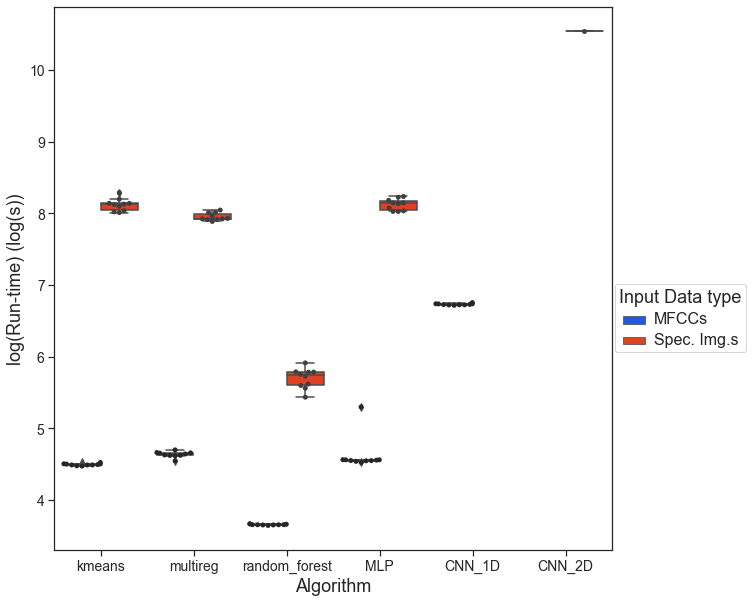

In [65]:
sns.set(style="ticks")
sns.set_palette(["#004dff", "#ff2d00"])

fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.boxplot(
    x="algorithm", y="log-times", hue="input", data=df2, ax=ax
)
sns.swarmplot(
    x="algorithm", y="log-times", hue="input", data=df2, ax=ax,
    color=".25", dodge=True
)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Algorithm", fontsize=18)
ax.set_ylabel("log(Run-time) (log(s))", fontsize=18)

hands, labs = ax.get_legend_handles_labels()
ax.legend(hands[:2], labs[:2])
plt.setp(ax.get_legend().get_texts(), fontsize=16)
ax.get_legend().set_title(title="Input Data type")
plt.setp(ax.get_legend().get_title(), fontsize=18)
ax.get_legend().set_bbox_to_anchor(bbox=(1.25, 0.5))

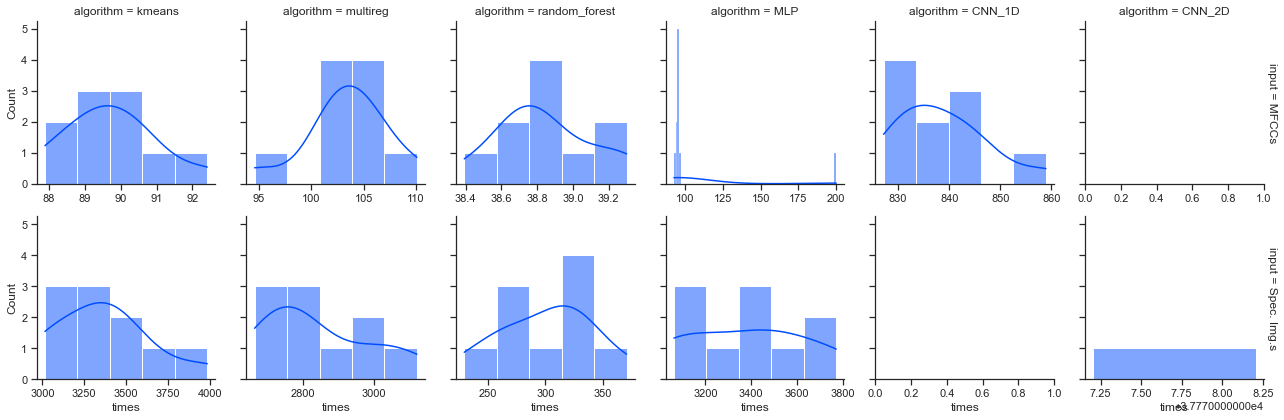

In [30]:
g = sns.FacetGrid(
    data=df_time, row="input", col="algorithm",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="times", kde=True
)

In [31]:
avg = df_time.groupby(["algorithm", "input"]).mean()
avg.rename(columns={"times": "Avg. Run-times"}).round(3).to_clipboard()
avg.rename(columns={"times": "Avg. Run-times"})

Avg. Run-times
algorithm     input                      
CNN_1D        MFCCs            838.846815
CNN_2D        Spec. Img.s    37777.704924
MLP           MFCCs            105.416271
              Spec. Img.s     3381.059314
kmeans        MFCCs             89.753692
              Spec. Img.s     3368.492561
multireg      MFCCs            103.389996
              Spec. Img.s     2845.378073
random_forest MFCCs             38.842509
              Spec. Img.s      300.899517

In [32]:
df_time.groupby("algorithm_input").var()

times
algorithm_input                          
CNN_1D (MFCCs)                  86.440894
CNN_2D (Spec. Img.s)                  NaN
MLP (MFCCs)                   1114.709131
MLP (Spec. Img.s)            71833.817270
kmeans (MFCCs)                   1.713510
kmeans (Spec. Img.s)         85394.141011
multireg (MFCCs)                16.349548
multireg (Spec. Img.s)       23368.092429
random_forest (MFCCs)            0.075772
random_forest (Spec. Img.s)   1701.430322

In [33]:
aov = welch_anova(data=df_time, dv="times", between="algorithm_input")
aov

Source  ddof1      ddof2            F         p-unc       np2
0  algorithm_input      9  37.551755  9440.021037  3.739884e-60  0.998901

## No CNN2D

C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


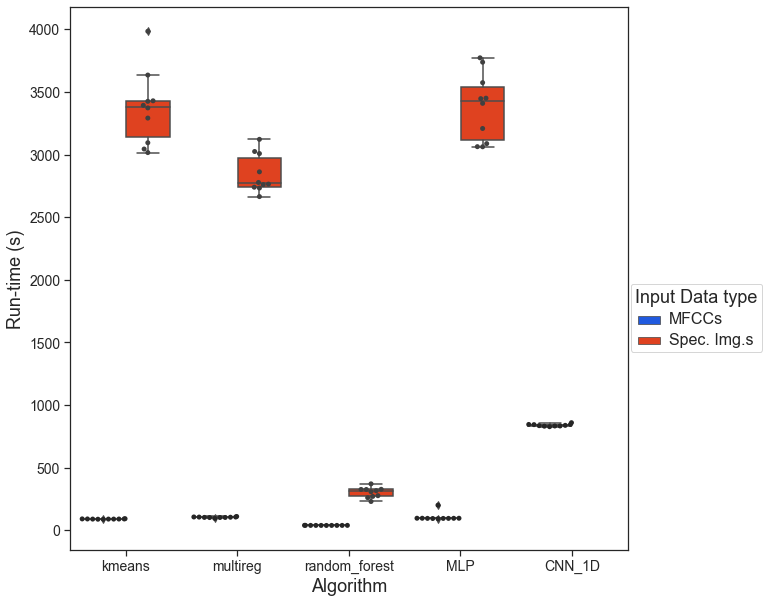

In [34]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(
    x="algorithm", y="times", hue="input", data=df_time.loc[df_time.algorithm != "CNN_2D"],
    ax=ax
)
sns.swarmplot(
    x="algorithm", y="times", hue="input", data=df_time.loc[df_time.algorithm != "CNN_2D"], 
    color=".25", dodge=True, ax=ax
)

ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Algorithm", fontsize=18)
ax.set_ylabel("Run-time (s)", fontsize=18)

hands, labs = ax.get_legend_handles_labels()
ax.legend(hands[:2], labs[:2])
plt.setp(ax.get_legend().get_texts(), fontsize=16)
ax.get_legend().set_title(title="Input Data type")
plt.setp(ax.get_legend().get_title(), fontsize=18)
ax.get_legend().set_bbox_to_anchor(bbox=(1.25, 0.5))

In [35]:
aov = welch_anova(data=df_time.loc[df_time.algorithm != "CNN_2D"], dv="times", between="algorithm_input")
aov

Source  ddof1      ddof2             F         p-unc       np2
0  algorithm_input      8  30.344853  10511.764684  4.877899e-50  0.990947

## Within input types

In [36]:
df_time.loc[df_time.input == "Spec. Img.s"].shape

(41, 4)

In [37]:
aov = welch_anova(data=df_time.loc[df_time.input == "MFCCs"], dv="times", between="algorithm_input")
aov

Source  ddof1     ddof2             F         p-unc       np2
0  algorithm_input      4  18.41823  20391.135478  2.686762e-33  0.997611

In [38]:
aov = welch_anova(data=df_time.loc[df_time.input == "Spec. Img.s"], dv="times", between="algorithm_input")
aov

Source  ddof1      ddof2            F         p-unc       np2
0  algorithm_input      4  25.647085  1079.899327  3.588095e-28  0.998721

## Between input types

Text(0, 0.5, 'Run-time (s)')

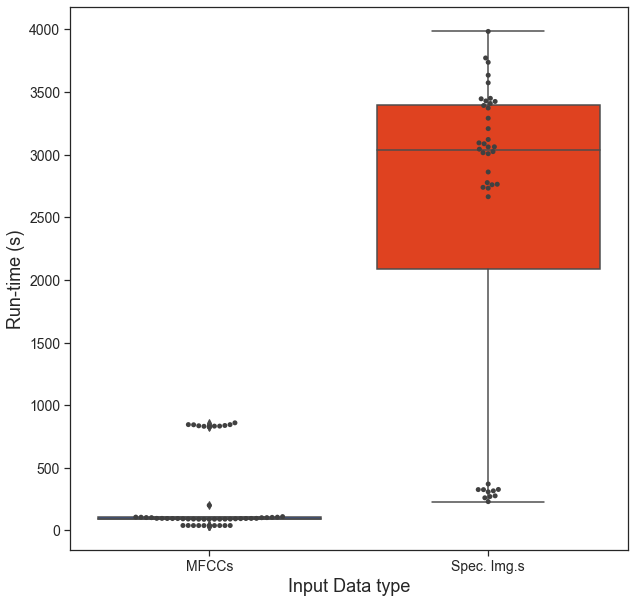

In [39]:
# run times
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(
    x="input", y="times", data=df_time.loc[df_time.algorithm != "CNN_2D"]
)
sns.swarmplot(
    x="input", y="times", data=df_time.loc[df_time.algorithm != "CNN_2D"], 
    color=".25"
)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Input Data type", fontsize=18)
ax.set_ylabel("Run-time (s)", fontsize=18)

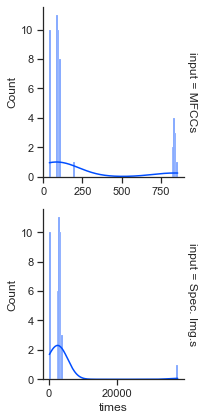

In [40]:
g = sns.FacetGrid(
    data=df_time, row="input",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="times", kde=True
)

In [41]:
df_time.groupby("input")["times"].mean()

input
MFCCs           235.249856
Spec. Img.s    3335.024380
Name: times, dtype: float64

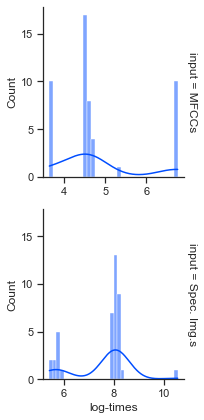

In [45]:
g = sns.FacetGrid(
    data=df2, row="input",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="log-times", kde=True
)

Text(0, 0.5, 'log(Run-time) (log(s))')

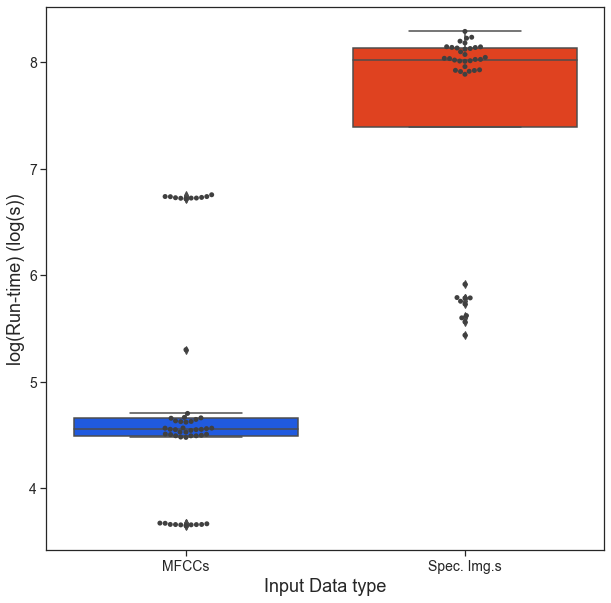

In [46]:
# run times
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.boxplot(
    x="input", y="log-times", data=df2.loc[df2.algorithm != "CNN_2D"]
)
sns.swarmplot(
    x="input", y="log-times", data=df2.loc[df_time.algorithm != "CNN_2D"], 
    color=".25"
)
ax.tick_params(axis="both", labelsize=14)
ax.set_xlabel("Input Data type", fontsize=18)
ax.set_ylabel("log(Run-time) (log(s))", fontsize=18)

In [47]:
x = df2.loc[df2.input == "MFCCs"]["log-times"]
y = df2.loc[df2.input == "Spec. Img.s"]["log-times"]
dof = (x.var()/x.size+ y.var()/y.size)**2 / (x.var()**2/((x.size**2)*(x.size-1)) + y.var()**2/((y.size**2)*(y.size-1)))
# Cohen's d
d = (x.mean() - y.mean()) / np.sqrt((x.var() + y.var())/2)

t, p = stats.ttest_ind(
    x, y,
    equal_var=False, random_state=42
    )
print(f"Welch's t-test: t={t:.3f}; p={p:.3e}")
print(f"Welch's DoF: {dof}")
print(f"Cohen's d {d}")

Welch's t-test: t=-11.818; p=2.214e-19
Welch's DoF: 81.86508813776179
Cohen's d -2.501609132601589


In [48]:
# excluding 2D CNN
x = df2.loc[(df2.algorithm != "CNN_2D") & (df2.input == "MFCCs")]["log-times"]
y = df2.loc[(df2.algorithm != "CNN_2D") & (df2.input == "Spec. Img.s")]["log-times"]
dof = (x.var()/x.size+ y.var()/y.size)**2 / (x.var()**2/((x.size**2)*(x.size-1)) + y.var()**2/((y.size**2)*(y.size-1)))

t, p = stats.ttest_ind(
    x, y,
    equal_var=False, random_state=42
    )

# Cohen's d
d = (x.mean() - y.mean()) / np.sqrt((x.var() + y.var())/2)

print(f"Welch's t-test: t={t:.3f}; p={p:.3e}")
print(f"Welch's DoF: {dof}")
print(f"Cohen's d {d}")

Welch's t-test: t=-11.986; p=8.018e-20
Welch's DoF: 83.32311294324982
Cohen's d -2.544134378058202


# Comparison: MFCCs vs. Spectrograms

## pairwise

In [49]:
# comparison of MFCCs vs spectrograms w/ McNemar

def mcnemar_fold(y, clf1_pred, clf2_pred, n_folds):

    chi, p = [], []

    for i in range(n_folds):
        s = i * len(y)//n_folds
        f = i * len(y)//n_folds + len(y)//n_folds

        tmp_c, tmp_p, _ = mcnemar_test(
            y_true=y[s:f],
            clf1_pred=clf1_pred[s:f],
            clf2_pred=clf2_pred[s:f],
            print_contingency=False
            )
        
        chi.append(tmp_c)
        p.append(tmp_p)
    
    return chi, p

In [50]:
d = {
    "kmeans": mcnemar_fold(
        y=kmeans_vm["ytrues"], 
        clf1_pred=kmeans_vm["pred"],
        clf2_pred=kmeans_vs["pred"],
        n_folds=10
    ),
    "multireg": mcnemar_fold(
        y=multireg_vm["ytrues"], 
        clf1_pred=multireg_vm["pred"],
        clf2_pred=multireg_vs["pred"],
        n_folds=10
    ),
    "random_forest": mcnemar_fold(
        y=rf_vm["ytrues"], 
        clf1_pred=rf_vm["pred"],
        clf2_pred=rf_vs["pred"],
        n_folds=10
    ),
    "MLP": mcnemar_fold(
        y=ann_vm["ytrues"], 
        clf1_pred=ann_vm["pred"],
        clf2_pred=ann_vs["pred"],
        n_folds=10
    ),
    "CNN": mcnemar_fold(
        y=cnn_vm["ytrues"][0:36], 
        clf1_pred=cnn_vm["pred"][0:36],
        clf2_pred=cnn_vs["pred"],
        n_folds=1
    )
}

In [51]:
df_mcnemar = pd.DataFrame(columns=["algorithm", "Chi", "p-value"])

for k, x in d.items():
    tmp = pd.DataFrame(
        {
            "algorithm": [k] * len(x[0]),
            "Chi": x[0],
            "p-value": x[1]
        }
    )

    df_mcnemar = df_mcnemar.append(tmp, ignore_index=True)


# fun = lambda x: "<0.001" if x<0.001 else str(x)
df_mcnemar.round(3).to_clipboard()

df_mcnemar

algorithm       Chi   p-value
0          kmeans  1.125000  0.288844
1          kmeans  0.000000  1.000000
2          kmeans  0.000000  1.000000
3          kmeans  0.000000  1.000000
4          kmeans  0.000000  1.000000
5          kmeans  2.285714  0.130570
6          kmeans  0.000000  1.000000
7          kmeans  0.000000  1.000000
8          kmeans  1.777778  0.182422
9          kmeans  0.571429  0.449692
10       multireg  0.000000  1.000000
11       multireg  0.166667  0.683091
12       multireg  0.166667  0.683091
13       multireg  1.777778  0.182422
14       multireg  0.100000  0.751830
15       multireg  1.333333  0.248213
16       multireg  0.100000  0.751830
17       multireg  0.571429  0.449692
18       multireg  0.800000  0.371093
19       multireg  0.000000  1.000000
20  random_forest  2.083333  0.148915
21  random_forest  0.000000  1.000000
22  random_forest  3.272727  0.070440
23  random_forest  0.642857  0.422678
24  random_forest  1.500000  0.220671
25  random_forest  0.900000  0.342782
26  random_forest  0.363636  0.546494
27  random_forest  1.454545  0.227800
28  random_forest  0.000000  1.000000
29  random_forest  3.272727  0.070440
30            MLP  4.166667  0.041227
31            MLP  0.000000  1.000000
32            MLP  0.000000  1.000000
33            MLP  0.000000  1.000000
34            MLP  0.900000  0.342782
35            MLP  0.250000  0.617075
36            MLP  1.333333  0.248213
37            MLP  0.250000  0.617075
38            MLP  0.000000  1.000000
39            MLP  0.800000  0.371093
40            CNN  0.000000  1.000000

C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


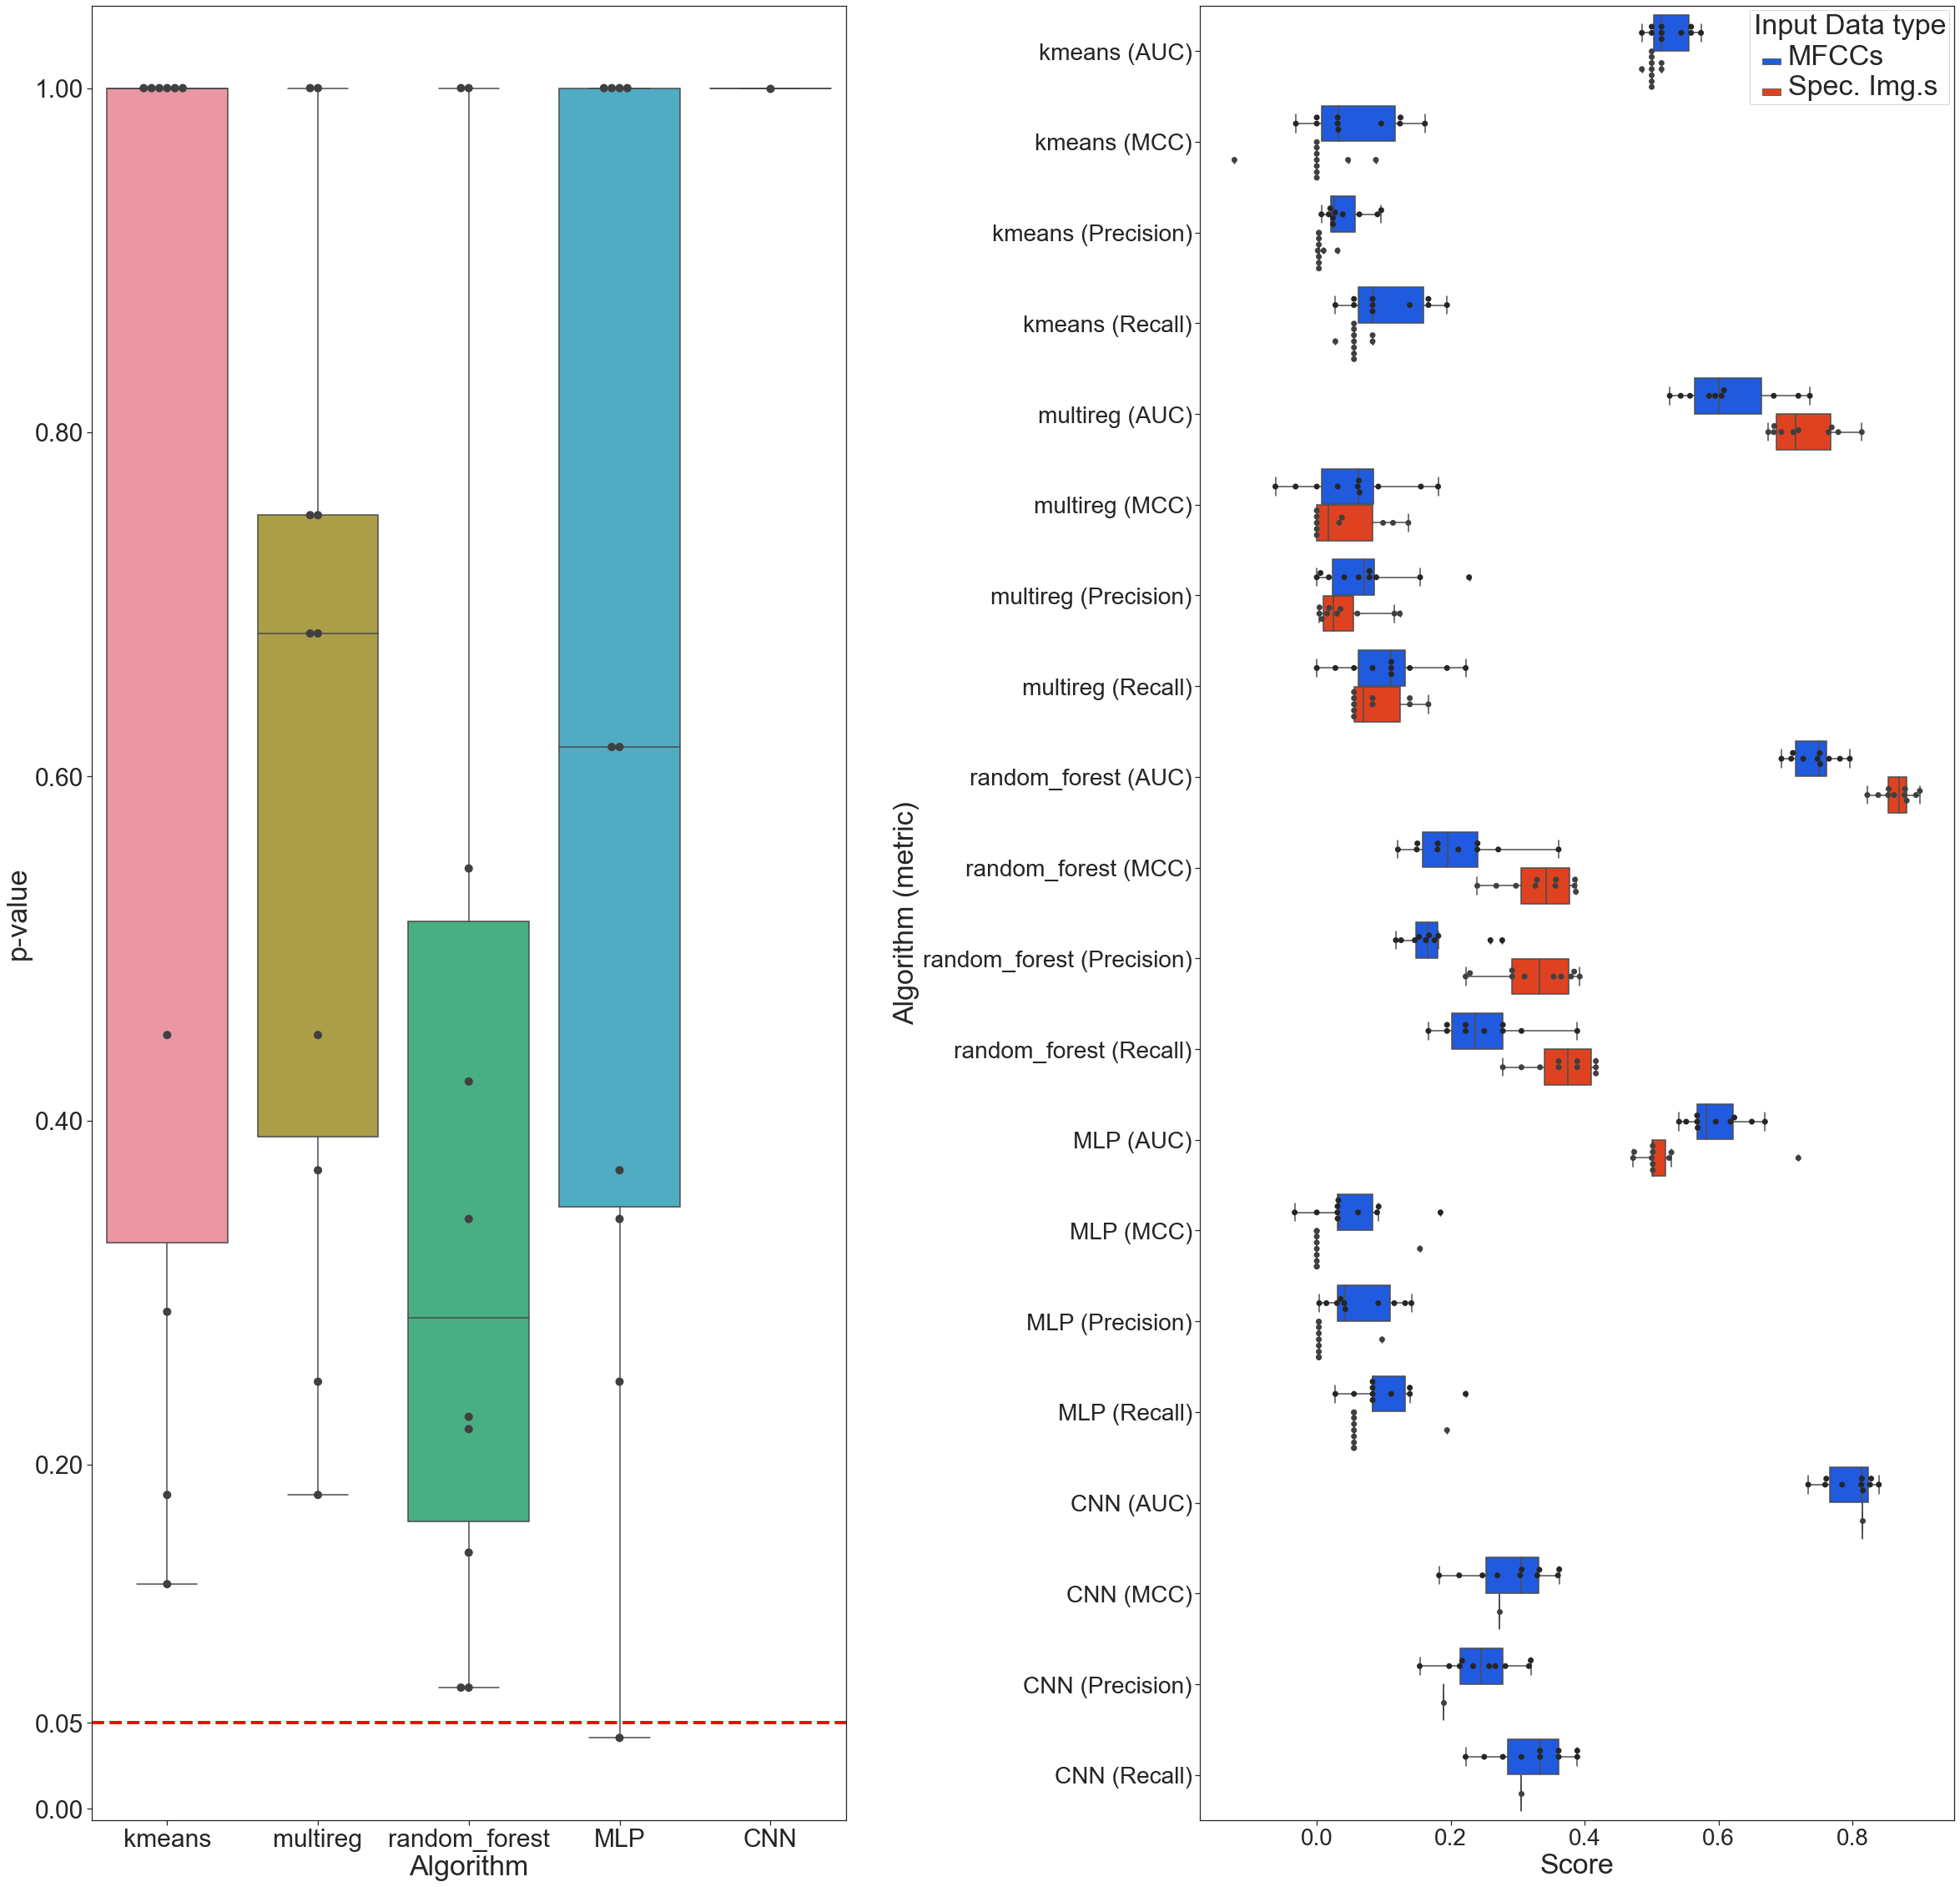

In [52]:
# performance (algorithm specific comparison)
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(40, 40))

ax = sns.boxplot(
    x="algorithm", y="p-value", data=df_mcnemar, ax=ax
)
sns.swarmplot(
    x="algorithm", y="p-value", data=df_mcnemar, color=".25", s=10,
    ax=ax
)
ax.axhline(0.05, linestyle="--", linewidth=4, color="red")
ax.tick_params(axis="both", labelsize=30)
ax.set_xlabel("Algorithm", fontsize=34)
ax.set_ylabel("p-value", fontsize=34)
ax.set_yticks(list(ax.get_yticks())[1:-1] + [0.05])

sns.boxplot(
    x="value", y="algorithm_metric", hue="input", data=df, ax=ax2,
    orient="h"
)
sns.swarmplot(
    x="value", y="algorithm_metric", hue="input", s=7, data=df, 
    dodge=True, color=".25", ax=ax2
)
ax2.tick_params(axis="both", labelsize=28)
ax2.set_ylabel("Algorithm (metric)", fontsize=34)
ax2.set_xlabel("Score", fontsize=34)

hands, labs = ax2.get_legend_handles_labels()
ax2.legend(hands[:2], labs[:2])
ax2.get_legend().set_title("Input Data type")
plt.setp(ax2.get_legend().get_title(), fontsize=34)
plt.setp(ax2.get_legend().get_texts(), fontsize=34)

plt.subplots_adjust(wspace=0.47)

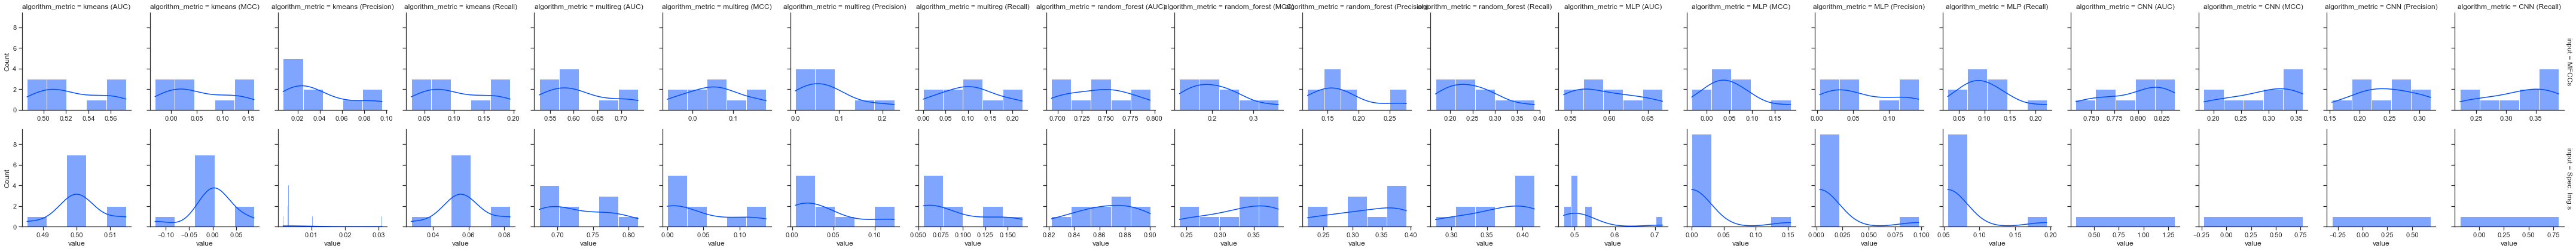

In [53]:
g = sns.FacetGrid(
    data=df, row="input", col="algorithm_metric",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="value", kde=True
)


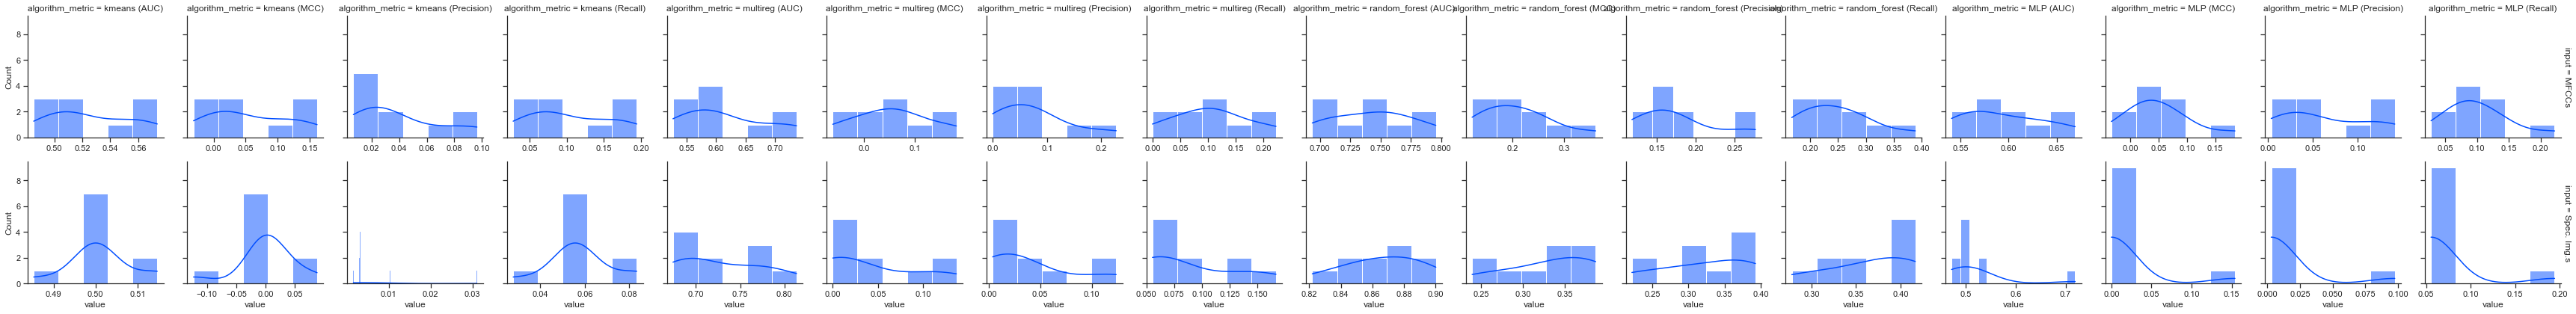

In [54]:
# excluding CNNs from pairwise comparisons (only 1 obs for 2D CNN)
df2 = df.loc[df.algorithm != "CNN"].copy(deep=True)

g = sns.FacetGrid(
    data=df2, row="input", col="algorithm_metric",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="value", kde=True
)

In [55]:
W = pd.DataFrame(columns=["algorithm", "metric", "t", "p-value", "DoF", "d"])

i = 0
for algo in df2.algorithm.unique():

    tmp = df2.loc[df2.algorithm == algo]

    for metr in tmp.metric.unique():
        x = tmp.loc[(tmp.input == "MFCCs") & (tmp.metric == metr)]["value"]
        y = tmp.loc[(tmp.input == "Spec. Img.s") & (tmp.metric == metr)]["value"]
        dof = (x.var()/x.size+ y.var()/y.size)**2 / (x.var()**2/((x.size**2)*(x.size-1)) + y.var()**2/((y.size**2)*(y.size-1)))

        t, p = stats.ttest_ind(
            x, y,
            equal_var=False, random_state=42
            )

        # Cohen's d
        d = (x.mean() - y.mean()) / np.sqrt((x.var() + y.var())/2)
        
        W = W.append(pd.DataFrame(
            {
            "algorithm": algo,
            "metric": metr,
            "t": t,
            "p-value": p,
            "DoF": dof,
            "d": d
            },
            index=[i]
            )
        )
        i += 1


W = W.groupby(["algorithm", "metric"]).mean() # not actually a mean


dd = W.round(3).copy(deep=True)

dd["p-value"].astype(np.str_)

def fun(x):
    if float(x) < 0.001:
        return "<0.001"
    else:
        return str(x)

l = []
for i, p in enumerate(dd["p-value"]):

    l.append(fun(p))

dd["p-value"] = l
dd.to_clipboard()

W

t       p-value        DoF         d
algorithm     metric                                                
MLP           AUC        2.748180  1.507232e-02  14.815516  1.229023
              MCC        1.500175  1.516299e-01  17.269102  0.670899
              Precision  2.813318  1.338226e-02  14.587548  1.258154
              Recall     1.513193  1.483112e-01  17.274418  0.676720
kmeans        AUC        2.534210  2.889003e-02  10.380088  1.133333
              MCC        2.112188  4.950907e-02  17.290671  0.944599
              Precision  3.331934  7.165009e-03  10.441958  1.490086
              Recall     2.534210  2.889003e-02  10.380088  1.133333
multireg      AUC       -4.081844  8.969287e-04  15.732830 -1.825456
              MCC        0.451940  6.572951e-01  16.226678  0.202114
              Precision  1.286915  2.173246e-01  15.242809  0.575526
              Recall     0.647834  5.268359e-01  15.075820  0.289720
random_forest AUC       -9.411460  4.344443e-08  16.711507 -4.208933
              MCC       -4.429933  3.971245e-04  16.407960 -1.981126
              Precision -5.610135  2.852913e-05  17.420233 -2.508929
              Recall    -4.523136  3.170490e-04  16.615520 -2.022808

## between input types

C:\Users\adelu\anaconda3\envs\MScThesis\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


value
metric    input                
AUC       MFCCs        0.655539
          Spec. Img.s  0.658656
MCC       MFCCs        0.133088
          Spec. Img.s  0.102183
Precision MFCCs        0.120744
          Spec. Img.s  0.097921
Recall    MFCCs        0.177222
          Spec. Img.s  0.149729

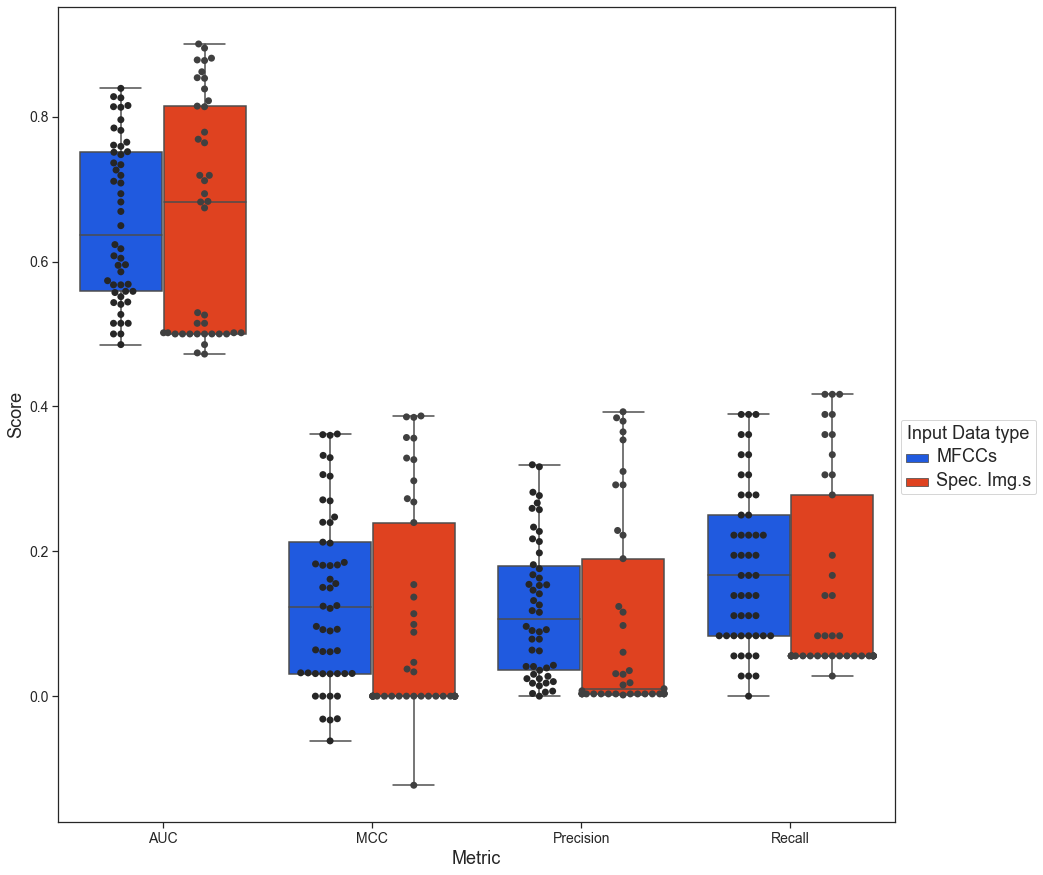

In [56]:
# in general
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

sns.boxplot(
    x="metric", y="value", hue="input", data=df
)
sns.swarmplot(
    x="metric", y="value", hue="input", data=df,
    dodge=True, color=".25", s=7
)
ax.set_xlabel("Metric", fontsize=18)
ax.set_ylabel("Score", fontsize=18)
ax.tick_params(axis="both", labelsize=14)

hands, labs = ax.get_legend_handles_labels()
ax.legend(hands[:2], labs[:2])
plt.setp(ax.get_legend().get_texts(), fontsize=18)
ax.get_legend().set_title(title="Input Data type")
plt.setp(ax.get_legend().get_title(), fontsize=18)
ax.get_legend().set_bbox_to_anchor(bbox=(1.175, 0.5))


df.groupby(["metric", "input"]).mean().round(3).to_clipboard()
df.groupby(["metric", "input"]).mean()

In [57]:
# McNemar's test average
df_mcnemar.groupby("algorithm").mean()

Chi   p-value
algorithm                        
CNN            0.000000  1.000000
MLP            0.770000  0.623747
kmeans         0.575992  0.705153
multireg       0.501587  0.612126
random_forest  1.348983  0.405022

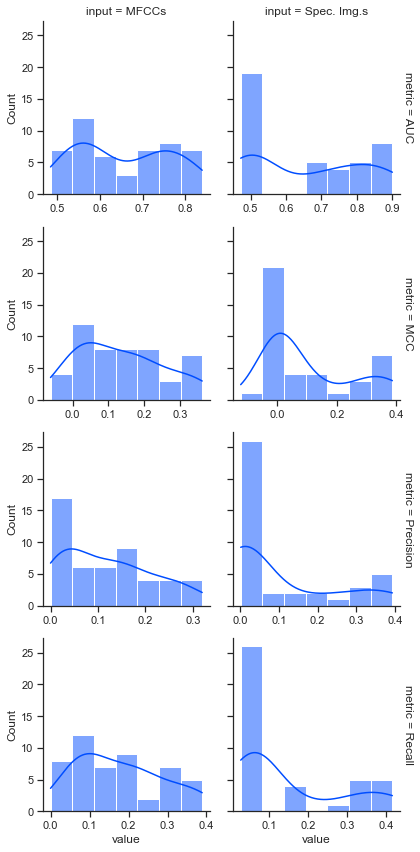

In [58]:
g = sns.FacetGrid(
    data=df, row="metric", col="input",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="value", kde=True
)

In [59]:
W = pd.DataFrame(columns=["metric", "t", "p-value", "DoF", "d"])

for i, metr in enumerate(df.metric.unique()):
    x = df.loc[(df.input == "MFCCs") & (df.metric == metr)]["value"]
    y = df.loc[(df.input == "Spec. Img.s") & (df.metric == metr)]["value"]
    dof = (x.var()/x.size+ y.var()/y.size)**2 / (x.var()**2/((x.size**2)*(x.size-1)) + y.var()**2/((y.size**2)*(y.size-1)))
    
    t, p = stats.ttest_ind(
        x, y,
        equal_var=False, random_state=42
        )
    
    # Cohen's d
    d = (x.mean() - y.mean()) / np.sqrt((x.var() + y.var())/2)
    
    W = W.append(pd.DataFrame(
        {
        "metric": metr,
        "t": t,
        "p-value": p,
        "DoF": dof,
        "d": d
        },
        index=[i]
        )
    )

W.round(3).to_clipboard()
W

metric         t   p-value        DoF         d
0        AUC -0.106541  0.915463  68.833219 -0.022836
1        MCC  1.082903  0.282264  76.256009  0.230549
2  Precision  0.902663  0.369892  67.996826  0.193625
3     Recall  1.046960  0.298422  76.331463  0.222881

# Comparison RF vs CNN

In [60]:
tmp = df.loc[(df.input=="MFCCs") & (df.algorithm.isin(["random_forest", "CNN"]))].copy(deep=True)
tmp["algorithm"] = pd.Categorical(tmp["algorithm"], ["random_forest", "CNN"])
tmp.groupby(["algorithm", "metric"]).mean()

value
algorithm     metric             
random_forest AUC        0.743056
              MCC        0.210440
              Precision  0.176713
              Recall     0.250000
CNN           AUC        0.797222
              MCC        0.290512
              Precision  0.245701
              Recall     0.322222

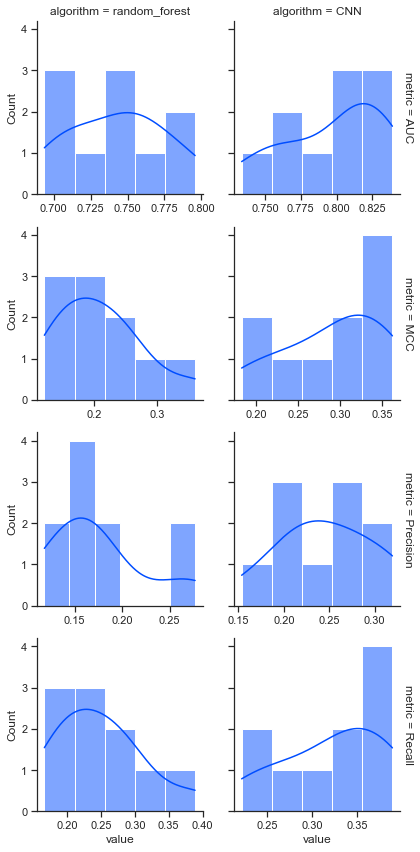

In [61]:
g = sns.FacetGrid(
    data=tmp, row="metric", col="algorithm",
    margin_titles=True, sharex=False
)
g.map_dataframe(
    sns.histplot, x="value", kde=True
)

In [62]:
W = pd.DataFrame(columns=["metric", "t", "p-value", "DoF"])

for i, metr in enumerate(df.metric.unique()):
    x = tmp.loc[df.metric == metr]["value"]
    y = df.loc[df.metric == metr]["value"]
    dof = (x.var()/x.size+ y.var()/y.size)**2 / (x.var()**2/((x.size**2)*(x.size-1)) + y.var()**2/((y.size**2)*(y.size-1)))
    
    t, p = stats.ttest_ind(
        x, y,
        equal_var=False, random_state=42
        )
    
    W = W.append(pd.DataFrame(
        {
        "metric": metr,
        "t": t,
        "p-value": p,
        "DoF": dof
        },
        index=[i]
        )
    )
W

metric         t       p-value        DoF
0        AUC  6.652301  1.894205e-09  94.020741
1        MCC  5.959341  2.869775e-07  48.115183
2  Precision  5.460952  1.322993e-06  52.379944
3     Recall  5.974653  2.746604e-07  47.970369